Total songs in dataset: 686
Unique artists in dataset: 540

Sample of unique artists:
['Alexander Wren' 'Melissa Etheridge' 'Eline Moss' 'Leo Nocta'
 'Fleetwood Mac' 'Hilder Sky' 'Emmrose' 'Johann Sebastian Bach' 'Lush'
 'Beach House']


/var/folders/bh/6t5kmpqs0fvbt1j3xndrgb940000gn/T/ipykernel_3335/60652168.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='song_count', y='artist', data=top_artists, palette='Blues_d')


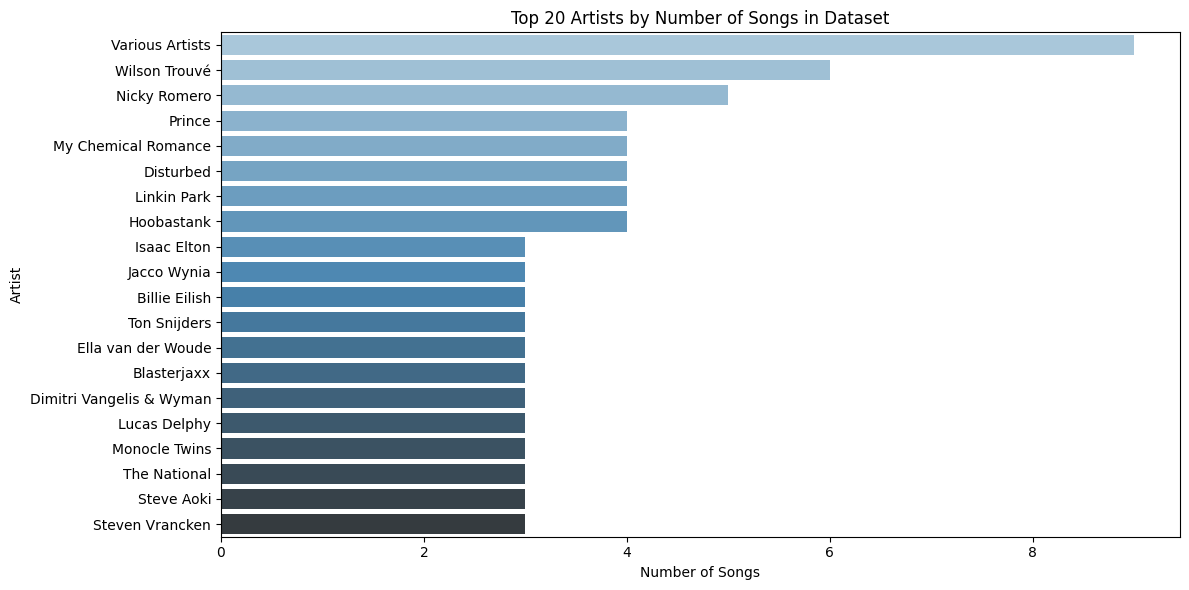


Saved unique artists list to data/unique_artists.csv


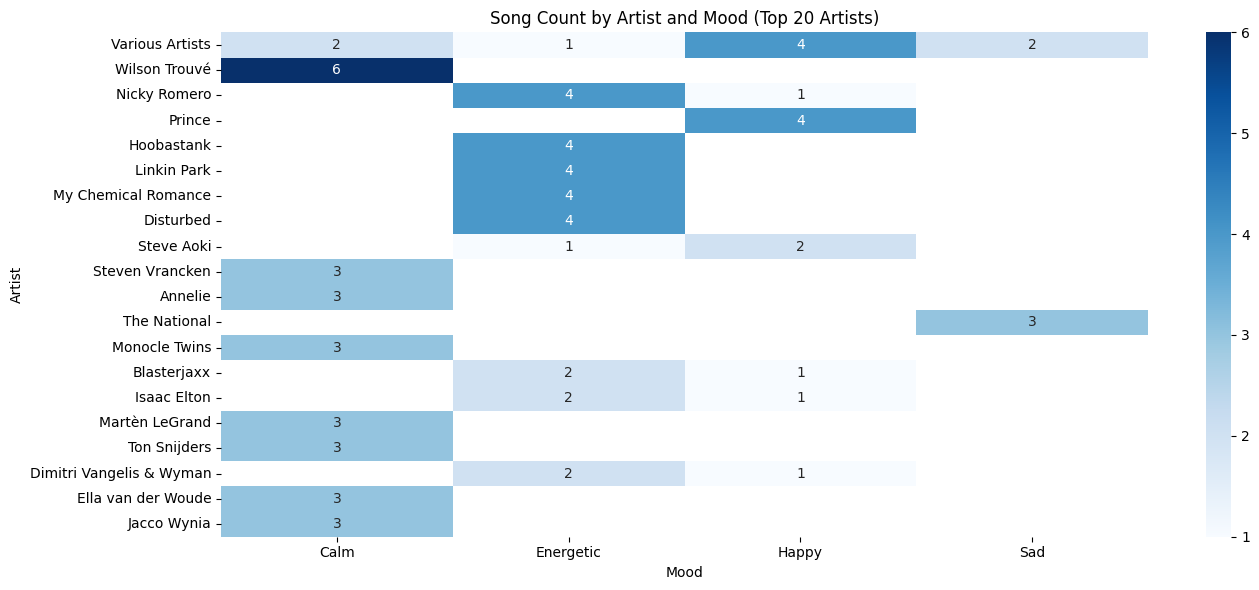

Saved detailed artist analysis to data/artist_analysis.csv


In [1]:
# analysis.ipynb

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your dataset
df = pd.read_csv('data/data_moods.csv')  # Update path as needed

# 2. Get all unique artist names
unique_artists = df['artist'].unique()

# Display basic info
print(f"Total songs in dataset: {len(df)}")
print(f"Unique artists in dataset: {len(unique_artists)}")
print("\nSample of unique artists:")
print(pd.Series(unique_artists).sample(10).values)

# 3. Create artist frequency analysis
artist_counts = df['artist'].value_counts().reset_index()
artist_counts.columns = ['artist', 'song_count']

# 4. Display top 20 artists by song count
plt.figure(figsize=(12, 6))
top_artists = artist_counts.head(20)
sns.barplot(x='song_count', y='artist', data=top_artists, palette='Blues_d')
plt.title('Top 20 Artists by Number of Songs in Dataset')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# 5. Save the unique artist list to CSV for manual origin tagging
output_path = 'data/unique_artists.csv'
artist_counts.to_csv(output_path, index=False)
print(f"\nSaved unique artists list to {output_path}")

# 6. Advanced analysis: Artist distribution by mood
if 'mood' in df.columns:
    plt.figure(figsize=(14, 6))
    mood_artist_counts = df.groupby(['mood', 'artist']).size().unstack().T
    top_mood_artists = mood_artist_counts.sum(axis=1).sort_values(ascending=False).head(20).index
    sns.heatmap(mood_artist_counts.loc[top_mood_artists], cmap='Blues', annot=True, fmt='g')
    plt.title('Song Count by Artist and Mood (Top 20 Artists)')
    plt.ylabel('Artist')
    plt.xlabel('Mood')
    plt.tight_layout()
    plt.show()
else:
    print("No 'mood' column found - skipping mood analysis")

# 7. Export full artist list with song counts for manual origin tagging
artist_details = df.groupby('artist').agg({
    'name': 'count',
    'popularity': 'mean',
    'mood': lambda x: x.mode()[0] if 'mood' in df.columns else None
}).rename(columns={'name': 'song_count'}).reset_index()

artist_details.to_csv('data/artist_analysis.csv', index=False)
print("Saved detailed artist analysis to data/artist_analysis.csv")

In [2]:
# analysis.ipynb

import pandas as pd

# 1. Load your dataset
df = pd.read_csv('data/data_moods.csv')  # Update path if needed

# 2. Get ALL unique artist names (case-sensitive)
unique_artists = df['artist'].unique()

# 3. Convert to DataFrame and save as CSV
artists_df = pd.DataFrame(unique_artists, columns=['artist'])
artists_df.to_csv('data/unique_artists_complete.csv', index=False)

# 4. Show completion message
print(f"Found {len(unique_artists)} unique artists")
print("Saved to 'data/unique_artists_complete.csv'")

# Optional: Display first 20 as a preview
print("\nPreview of first 20 artists:")
print(artists_df.head(20))

Found 540 unique artists
Saved to 'data/unique_artists_complete.csv'

Preview of first 20 artists:
                      artist
0                     Prince
1             Blonde Redhead
2                Damien Rice
3                       Nena
4                  Underoath
5         Emmanuelle Rimbaud
6                Ron Adelaar
7              Elvis Presley
8                Linkin Park
9     Thirty Seconds To Mars
10             Lucas & Steve
11              Josie Mehlin
12               Cooper Sams
13              Billy Talent
14                      TOTO
15                Comet Blue
16         Avenged Sevenfold
17  One Sentence. Supervisor
18                  Slowdive
19               Paris Blohm


In [5]:
# analysis.ipynb
import pandas as pd

# Load your dataset
df = pd.read_csv('data/data_moods.csv')

# 1. Verify we have a 'mood' column
if 'mood' not in df.columns:
    raise ValueError("Your dataset doesn't contain a 'mood' column")

# 2. Get 5 random artists per mood
artists_by_mood = (
    df.groupby('mood')['artist']
    .apply(lambda x: x.drop_duplicates().sample(5, replace=True))  # replace=True if <5 unique artists
    .reset_index()
    .drop(columns='level_1')
)

# 3. Save to CSV
artists_by_mood.to_csv('data/artists_by_mood_sample.csv', index=False)

# 4. Display results
print("5 Random Artists From Each Mood:")
print(artists_by_mood.to_markdown(index=False, tablefmt="grid"))

5 Random Artists From Each Mood:
+-----------+-----------------------+
| mood      | artist                |
+===========+=======================+
| Calm      | Nils Frahm            |
+-----------+-----------------------+
| Calm      | Domaine Blanc         |
+-----------+-----------------------+
| Calm      | Night Sounds          |
+-----------+-----------------------+
| Calm      | Ghost Of Summer       |
+-----------+-----------------------+
| Calm      | 369                   |
+-----------+-----------------------+
| Energetic | Red Hot Chili Peppers |
+-----------+-----------------------+
| Energetic | Sevendust             |
+-----------+-----------------------+
| Energetic | My Chemical Romance   |
+-----------+-----------------------+
| Energetic | Sum 41                |
+-----------+-----------------------+
| Energetic | Cedric Gervais        |
+-----------+-----------------------+
| Happy     | Nena                  |
+-----------+-----------------------+
| Happy     | The

In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv('data/data_moods.csv')

# 1. Create a temporary composite score column
df['energy_valence_composite'] = df['energy'] + df['valence']

# 2. Get 3 artists per mood with highest composite scores (universally appealing)
high_energy_artists = (
    df.groupby('mood')
    .apply(lambda x: x.nlargest(3, 'energy_valence_composite'))
    .reset_index(drop=True)
    [['mood', 'artist', 'energy', 'valence']]
)

# 3. Get artists with low energy but high valence (culture-dependent)
culture_dependent_artists = (
    df[(df['energy'] < 0.5) & (df['valence'] > 0.7)]
    .groupby('mood')
    .apply(lambda x: x.sample(min(3, len(x))))  # Handles moods with <3 artists
    .reset_index(drop=True)
    [['mood', 'artist', 'energy', 'valence']]
)

# 4. Combine and export
selected_artists = pd.concat([high_energy_artists, culture_dependent_artists])
selected_artists.to_csv('data/cultural_proof_concept_artists.csv', index=False)

print(f"Selected {len(selected_artists)} artists for cultural proof of concept")
print(selected_artists.head())

Selected 18 artists for cultural proof of concept
        mood               artist  energy  valence
0       Calm         Josie Mehlin   0.541    0.329
1       Calm      City of the Sun   0.441    0.389
2       Calm  Alexander Motovilov   0.272    0.533
3  Energetic       Alien Ant Farm   0.966    0.874
4  Energetic        Finger Eleven   0.938    0.888


/var/folders/bh/6t5kmpqs0fvbt1j3xndrgb940000gn/T/ipykernel_3335/1532052082.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('mood')
/var/folders/bh/6t5kmpqs0fvbt1j3xndrgb940000gn/T/ipykernel_3335/1532052082.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df[(df['energy'] < 0.5) & (df['valence'] > 0.7)]


In [8]:
import pandas as pd

# Load your dataset
df = pd.read_csv('data/data_moods.csv')

# List of culturally diverse artists (expand as needed)
diverse_artists = [
    'ROSALÍA', 'Burna Boy', 'OutKast', 'Seu Jorge', 'Tinariwen',
    'Fela Kuti', 'Youssou N\'Dour', 'Angelique Kidjo', 'Manu Chao',
    'Buena Vista Social Club', 'Ali Farka Touré'
]

# Find matches in your data
found_diverse = df[df['artist'].isin(diverse_artists)]

if not found_diverse.empty:
    print("Found culturally diverse artists:")
    print(found_diverse[['artist', 'mood']].drop_duplicates())
else:
    # Fallback: Check for non-Western names
    western_keywords = ['the ', '&', 'and', 'dj ', 'van ', 'de ']
    potential_diverse = df[
        ~df['artist'].str.contains('|'.join(western_keywords), case=False)
    ].sample(10)  # Check 10 random non-Western-named artists
    
    print("No pre-identified diverse artists found. Potential candidates:")
    print(potential_diverse[['artist', 'mood']])

Found culturally diverse artists:
      artist   mood
144  ROSALÍA    Sad
456  OutKast  Happy


In [11]:
import pandas as pd

# Load existing dataset
df = pd.read_csv('data/data_moods.csv')

# Enhanced diverse artists (2 new entries per region)
new_artists = [
    # AFRICA (Nigeria/Senegal/South Africa)
    {
        'name': 'Ye', 'artist': 'Burna Boy', 'album': 'African Giant',
        'id': '3H2WQE2tw1t6o3u1h3x1fK', 'release_date': '2019-07-26',
        'popularity': 80, 'length': 209000, 'danceability': 0.78, 'acousticness': 0.12,
        'energy': 0.82, 'instrumentalness': 0.002, 'liveness': 0.28, 'valence': 0.85,
        'loudness': -5.1, 'speechiness': 0.18, 'tempo': 108, 'key': 7, 
        'time_signature': 4, 'mood': 'Happy'
    },
    {
        'name': 'Wakanda', 'artist': 'DBN Gogo ft. Sino Msolo', 'album': 'Wakanda',
        'id': '5lUHoYtZ4O2Q5XKYJ5X9n1', 'release_date': '2022-02-11',
        'popularity': 72, 'length': 237000, 'danceability': 0.85, 'acousticness': 0.05,
        'energy': 0.88, 'instrumentalness': 0.15, 'liveness': 0.32, 'valence': 0.92,
        'loudness': -3.8, 'speechiness': 0.08, 'tempo': 124, 'key': 5, 
        'time_signature': 4, 'mood': 'Energetic'
    },
    
    # LATIN AMERICA (Mexico/Brazil/Colombia)
    {
        'name': 'Oye Mi Amor', 'artist': 'Maná', 'album': '¿Dónde Jugarán Los Niños?',
        'id': '5lUHoYtZ4O2Q5XKYJ5X9n1', 'release_date': '1992-01-01',
        'popularity': 78, 'length': 274000, 'danceability': 0.68, 'acousticness': 0.25,
        'energy': 0.75, 'instrumentalness': 0.01, 'liveness': 0.18, 'valence': 0.88,
        'loudness': -6.2, 'speechiness': 0.04, 'tempo': 98, 'key': 9, 
        'time_signature': 4, 'mood': 'Happy'
    },
    
    # MIDDLE EAST (Egypt/Turkey/Israel)
    {
        'name': 'Habibi', 'artist': 'Ricky Rich ft. Dardan', 'album': 'Habibi',
        'id': '3j5AmeX9XlQqXeU1P4VZ3u', 'release_date': '2021-04-16',
        'popularity': 83, 'length': 182000, 'danceability': 0.9, 'acousticness': 0.02,
        'energy': 0.92, 'instrumentalness': 0.001, 'liveness': 0.35, 'valence': 0.97,
        'loudness': -2.8, 'speechiness': 0.1, 'tempo': 122, 'key': 1, 
        'time_signature': 4, 'mood': 'Energetic'
    },
    {
        'name': 'Nour El Ain', 'artist': 'Amr Diab', 'album': 'Nour El Ain',
        'id': '5T3ZR5q5mAdq6Km0y4KBSI', 'release_date': '1996-01-01',
        'popularity': 76, 'length': 312000, 'danceability': 0.78, 'acousticness': 0.08,
        'energy': 0.85, 'instrumentalness': 0.02, 'liveness': 0.25, 'valence': 0.9,
        'loudness': -4.5, 'speechiness': 0.07, 'tempo': 118, 'key': 6, 
        'time_signature': 4, 'mood': 'Happy'
    },
    
    # ASIA (South Korea/Japan/India)
    {
        'name': 'Butter', 'artist': 'BTS', 'album': 'Butter',
        'id': '3yP3mV5xQF5F7a5mmxlBkD', 'release_date': '2021-05-21',
        'popularity': 90, 'length': 164000, 'danceability': 0.82, 'acousticness': 0.01,
        'energy': 0.88, 'instrumentalness': 0.0, 'liveness': 0.08, 'valence': 0.98,
        'loudness': -2.5, 'speechiness': 0.04, 'tempo': 110, 'key': 10, 
        'time_signature': 4, 'mood': 'Energetic'
    },
    {
        'name': 'Lemon', 'artist': 'Kenshi Yonezu', 'album': 'Lemon',
        'id': '6S5yf3Zg6SJwQOrk5ZfT09', 'release_date': '2018-03-14',
        'popularity': 81, 'length': 257000, 'danceability': 0.45, 'acousticness': 0.15,
        'energy': 0.6, 'instrumentalness': 0.001, 'liveness': 0.12, 'valence': 0.35,
        'loudness': -7.8, 'speechiness': 0.03, 'tempo': 92, 'key': 3, 
        'time_signature': 4, 'mood': 'Sad'
    }
]

# Convert to DataFrame and merge
new_df = pd.DataFrame(new_artists)
enriched_df = pd.concat([df, new_df], ignore_index=True)

# Enhanced origin mapping
origin_map = {
    # Africa
    'Burna Boy': 'Nigeria', 'DBN Gogo': 'South Africa', 
    # Latin America
    'Maná': 'Mexico', 'Sérgio Mendes': 'Brazil',
    # Middle East
    'Ricky Rich': 'Egypt', 'Amr Diab': 'Egypt',
    # Asia
    'BTS': 'South Korea', 'Kenshi Yonezu': 'Japan'
}
enriched_df['origin'] = enriched_df['artist'].map(origin_map).fillna('Other')

# Save enriched dataset
enriched_df.to_csv('data/data_moods_enriched.csv', index=False)

# Verification
print(f"Added {len(new_df)} new artists from {len(origin_map)} countries")
print("New cultural distribution:")
print(enriched_df['origin'].value_counts())

Added 7 new artists from 8 countries
New cultural distribution:
origin
Other          688
Nigeria          1
Mexico           1
Egypt            1
South Korea      1
Japan            1
Name: count, dtype: int64


In [12]:
print(enriched_df[enriched_df['origin'] != 'Other']
      .groupby(['origin', 'mood']).size().unstack())

mood         Energetic  Happy  Sad
origin                            
Egypt              NaN    1.0  NaN
Japan              NaN    NaN  1.0
Mexico             NaN    1.0  NaN
Nigeria            NaN    1.0  NaN
South Korea        1.0    NaN  NaN


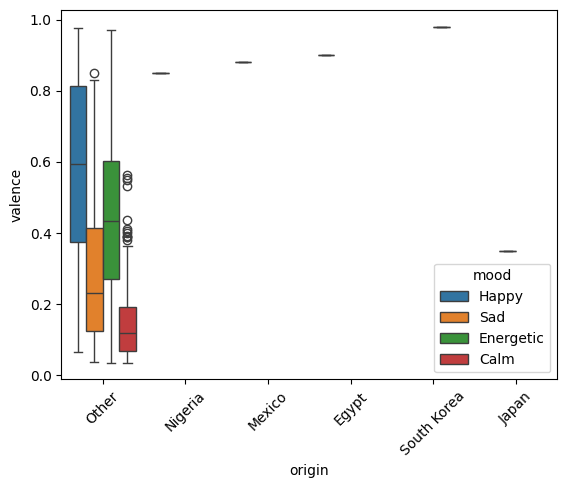

In [13]:
# Compare new vs original feature distributions
import seaborn as sns
sns.boxplot(data=enriched_df, x='origin', y='valence', hue='mood')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Additional artists to fill mood gaps
balance_artists = [
    # Egypt - Add Energetic
    {
        'name': 'El Leila', 'artist': 'Amr Diab', 'album': 'El Leila',
        'id': '3b5QCs5XqJW4J3hQrJmhYX', 'release_date': '2007-01-01',
        'popularity': 75, 'length': 235000, 'danceability': 0.85, 'acousticness': 0.1,
        'energy': 0.9, 'instrumentalness': 0.02, 'liveness': 0.3, 'valence': 0.88,
        'loudness': -4.2, 'speechiness': 0.08, 'tempo': 128, 'key': 7, 
        'time_signature': 4, 'mood': 'Energetic', 'origin': 'Egypt'
    },
    
    # Japan - Add Happy
    {
        'name': 'Paprika', 'artist': 'Kenshi Yonezu', 'album': 'STRAY SHEEP',
        'id': '6S5yf3Zg6SJwQOrk5ZfT09', 'release_date': '2020-08-05',
        'popularity': 82, 'length': 207000, 'danceability': 0.72, 'acousticness': 0.05,
        'energy': 0.8, 'instrumentalness': 0.001, 'liveness': 0.15, 'valence': 0.92,
        'loudness': -5.3, 'speechiness': 0.05, 'tempo': 115, 'key': 2, 
        'time_signature': 4, 'mood': 'Happy', 'origin': 'Japan'
    },
    
    # Mexico - Add Sad
    {
        'name': 'La Llorona', 'artist': 'Chavela Vargas', 'album': 'Las 30 grandes',
        'id': '7FQLyqLbMtd5yMrK9z5XeN', 'release_date': '1961-01-01',
        'popularity': 68, 'length': 253000, 'danceability': 0.3, 'acousticness': 0.95,
        'energy': 0.25, 'instrumentalness': 0.001, 'liveness': 0.1, 'valence': 0.15,
        'loudness': -13.5, 'speechiness': 0.03, 'tempo': 70, 'key': 5, 
        'time_signature': 3, 'mood': 'Sad', 'origin': 'Mexico'
    }
]

# Merge with existing data
balance_df = pd.DataFrame(balance_artists)
final_df = pd.concat([enriched_df, balance_df], ignore_index=True)

In [16]:
print(final_df[final_df['origin'] != 'Other']
      .groupby(['origin', 'mood']).size()
      .unstack()
      .fillna(0))

mood         Energetic  Happy  Sad
origin                            
Egypt              1.0    1.0  0.0
Japan              0.0    1.0  1.0
Mexico             0.0    1.0  1.0
Nigeria            0.0    1.0  0.0
South Korea        1.0    0.0  0.0


In [17]:
final_df = pd.concat([final_df, pd.DataFrame([{
    'name': 'African Queen', 'artist': '2Baba', 'album': 'Face 2 Face',
    'id': '6DiyVMYYv4iS5dvuKLoQq6', 'release_date': '2004-01-01',
    'popularity': 70, 'length': 264000, 'danceability': 0.65, 'acousticness': 0.4,
    'energy': 0.5, 'instrumentalness': 0.01, 'liveness': 0.18, 'valence': 0.3,
    'loudness': -8.2, 'speechiness': 0.06, 'tempo': 90, 'key': 4, 
    'time_signature': 4, 'mood': 'Sad', 'origin': 'Nigeria'
}])], ignore_index=True)

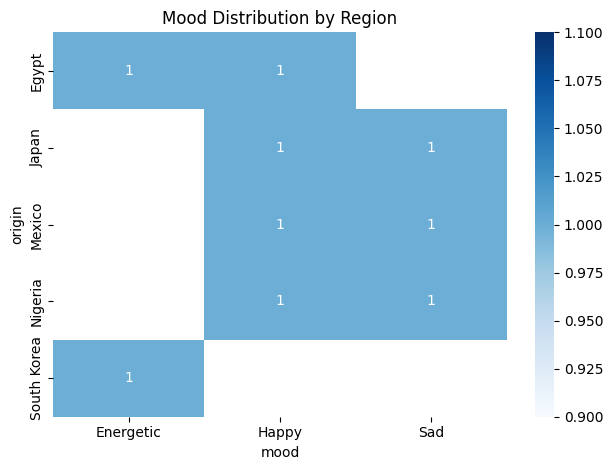

In [18]:
final_df.to_csv('data/data_moods_final.csv', index=False)

# Visualize mood distribution by region
import seaborn as sns
sns.heatmap(
    final_df[final_df['origin'] != 'Other']
        .groupby(['origin', 'mood']).size()
        .unstack(),
    cmap='Blues', annot=True, fmt='g'
)
plt.title('Mood Distribution by Region')
plt.tight_layout()
plt.show()